In [87]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [88]:
dftest=pd.read_csv('bigdatamart_Test.csv')
dftrain=pd.read_csv('bigdatamart_Train.csv')

In [89]:
dftrain["source"]="dftrain"
dftest["source"]="dftest"
dftest['Item_Outlet_Sales']=0
df=pd.concat([dftrain,dftest],ignore_index=True)
dftest.shape,dftrain.shape,df.shape

((5681, 13), (8523, 13), (14204, 13))

In [90]:
dftest['Item_Outlet_Sales'].shape

(5681,)

In [91]:
dftrain['Item_Outlet_Sales'].shape

(8523,)

In [92]:
dftest['Item_Outlet_Sales']

0       0
1       0
2       0
3       0
4       0
       ..
5676    0
5677    0
5678    0
5679    0
5680    0
Name: Item_Outlet_Sales, Length: 5681, dtype: int64

In [93]:
dftrain['Item_Outlet_Sales']

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [94]:
#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$#

In [95]:
#we already know that we have to predict the Item_Outlet_Sales

In [96]:
#so lets start working on actual whole data 'df'

In [97]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,dftrain
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,dftrain
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,dftrain
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,dftrain
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,dftrain
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,0.0000,dftest
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,0.0000,dftest
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,0.0000,dftest
14202,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,0.0000,dftest


In [98]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.792854,0.065953,141.004977,1997.830681,1308.865489
std,4.652502,0.051459,62.086938,8.371664,1699.791423
min,4.555000,0.000000,31.290000,1985.000000,0.000000
25%,8.710000,0.027036,94.012000,1987.000000,0.000000
50%,12.600000,0.054021,142.247000,1999.000000,559.272000
75%,16.750000,0.094037,185.855600,2004.000000,2163.184200
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [99]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'source'],
      dtype='object')

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

In [101]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
source                        object
dtype: object

In [102]:
#so we got to know their are 8 object type lets see where we have to covert into numerical data

In [103]:
df.select_dtypes('object')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,source
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,dftrain
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,dftrain
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1,dftrain
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store,dftrain
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1,dftrain
...,...,...,...,...,...,...,...,...
14199,FDB58,Regular,Snack Foods,OUT046,Small,Tier 1,Supermarket Type1,dftest
14200,FDD47,Regular,Starchy Foods,OUT018,Medium,Tier 3,Supermarket Type2,dftest
14201,NCO17,Low Fat,Health and Hygiene,OUT045,NaN,Tier 2,Supermarket Type1,dftest
14202,FDJ26,Regular,Canned,OUT017,NaN,Tier 2,Supermarket Type1,dftest


In [104]:
#these 8 columns lets check
#also check what we have to drop #which has nothing to do with sales

In [105]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
source                          0
dtype: int64

In [106]:
#lets see about those missing data in  the case of Item_Weight  and Outlet_Size       

In [107]:
df['Item_Weight'].unique()

array([ 9.3  ,  5.92 , 17.5  , 19.2  ,  8.93 , 10.395, 13.65 ,    nan,
       16.2  , 11.8  , 18.5  , 15.1  , 17.6  , 16.35 ,  9.   , 13.35 ,
       18.85 , 14.6  , 13.85 , 13.   ,  7.645, 11.65 ,  5.925, 19.25 ,
       18.6  , 18.7  , 17.85 , 10.   ,  8.85 ,  9.8  , 13.6  , 21.35 ,
       12.15 ,  6.42 , 19.6  , 15.85 ,  7.39 , 10.195,  9.895, 10.895,
        7.905,  9.195,  8.365,  7.97 , 17.7  , 19.35 ,  8.645, 15.6  ,
       18.25 ,  7.855,  7.825,  8.39 , 12.85 , 19.   ,  5.905,  7.76 ,
       16.75 , 15.5  ,  6.055,  6.305, 20.85 , 20.75 ,  8.895, 19.7  ,
        8.75 , 13.3  ,  8.31 , 19.75 , 17.1  , 10.5  ,  6.635, 14.15 ,
        8.89 ,  9.1  ,  7.5  , 16.85 ,  7.485, 11.6  , 12.65 , 20.25 ,
        8.6  , 12.6  ,  8.88 , 20.5  , 13.5  ,  7.235,  6.92 ,  8.02 ,
       12.8  , 16.6  , 14.   , 16.   , 21.25 ,  7.365, 18.35 ,  5.465,
        7.27 ,  6.155, 19.5  , 15.2  , 14.5  , 13.1  , 12.3  , 11.1  ,
       11.3  ,  5.75 , 11.35 ,  6.525, 10.3  ,  5.78 , 11.85 , 18.75 ,
      

In [108]:
#weight of the product lies around 0 to 21

In [109]:
df['Item_Weight'].isnull().sum(),df['Outlet_Size'].isnull().sum()

(2439, 4016)

In [110]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.015901,0.036236,0.000645,0.019447
Item_Visibility,-0.015901,1.000000,-0.006351,-0.083678,-0.075008
Item_MRP,0.036236,-0.006351,1.000000,0.000141,0.342781
Outlet_Establishment_Year,0.000645,-0.083678,0.000141,1.000000,-0.029489
Item_Outlet_Sales,0.019447,-0.075008,0.342781,-0.029489,1.000000


In [111]:
#now lets save those categorical data
categoricaldf = df.select_dtypes(include=[np.object])
categoricaldf

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,source
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,dftrain
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,dftrain
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1,dftrain
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store,dftrain
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1,dftrain
...,...,...,...,...,...,...,...,...
14199,FDB58,Regular,Snack Foods,OUT046,Small,Tier 1,Supermarket Type1,dftest
14200,FDD47,Regular,Starchy Foods,OUT018,Medium,Tier 3,Supermarket Type2,dftest
14201,NCO17,Low Fat,Health and Hygiene,OUT045,NaN,Tier 2,Supermarket Type1,dftest
14202,FDJ26,Regular,Canned,OUT017,NaN,Tier 2,Supermarket Type1,dftest


In [112]:
for col in categoricaldf:
    if categoricaldf[col].dtype=="object":
        print(categoricaldf[col].value_counts())
        print()

FDA38    10
FDB32    10
NCG43    10
FDT34    10
FDA50    10
         ..
FDS22     7
FDM52     7
FDH58     7
FDX49     7
FDL50     7
Name: Item_Identifier, Length: 1559, dtype: int64

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

OUT027    1559
OUT013    1553
OUT049    1550
OUT035    1550
OUT046    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64


In [113]:
#taking care of missing data 

In [114]:
df['Item_Weight'].isnull().sum()   ,    df['Outlet_Size'].isnull().sum()

(2439, 4016)

In [115]:
df['Item_Weight'] = df.groupby('Item_Identifier')['Item_Weight'].transform(lambda x:x.fillna(x.mean()))
df['Outlet_Size']=df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0])# object types so use mode

In [116]:
df['Item_Weight'].isnull().sum()   ,    df['Outlet_Size'].isnull().sum()   ,     df.isnull().sum()

(0,
 0,
 Item_Identifier              0
 Item_Weight                  0
 Item_Fat_Content             0
 Item_Visibility              0
 Item_Type                    0
 Item_MRP                     0
 Outlet_Identifier            0
 Outlet_Establishment_Year    0
 Outlet_Size                  0
 Outlet_Location_Type         0
 Outlet_Type                  0
 Item_Outlet_Sales            0
 source                       0
 dtype: int64)

In [117]:
#We have succesfully imputed the missing values from the column Item_Weight and Outlet_Size.

In [118]:
#above we saw some irregularities in item_Fat_Content column
df['Item_Fat_Content'].value_counts()


Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [119]:
# we see that there are basically two types of fat low fat and regular # so we will LF and low fat to Low Fat and reg to Regular

In [120]:
df['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)
#does it effect the outlet sales column-----> no

In [121]:
df['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [122]:
#we check every column correlated with Item_Outlet_Sales
#such as

In [123]:
df["Item_Identifier"].value_counts()

FDA38    10
FDB32    10
NCG43    10
FDT34    10
FDA50    10
         ..
FDS22     7
FDM52     7
FDH58     7
FDX49     7
FDL50     7
Name: Item_Identifier, Length: 1559, dtype: int64

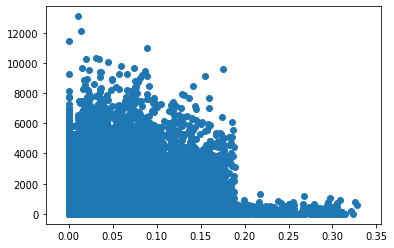

In [124]:
plt.scatter('Item_Visibility','Item_Outlet_Sales',data=df)


In [125]:
                                #item visibility#
    
# one can observe about the item visibility is that it can't be 0 so it also needs to be replaced
#We can replace 0 by mean of item visibilty related to item identifier

In [126]:
df['Item_Visibility']=df['Item_Visibility'].replace(0,df['Item_Visibility'].mean())
df.Item_Visibility.isnull().sum()

0

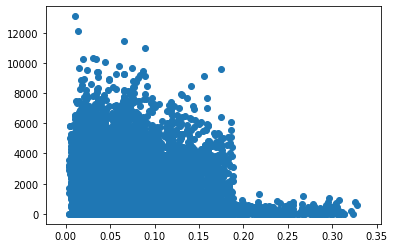

In [127]:
plt.scatter('Item_Visibility','Item_Outlet_Sales',data=df)


In [128]:

#done with item visibility

In [129]:
df#updated

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,dftrain
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,dftrain
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,dftrain
3,FDX07,19.20,Regular,0.065953,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,dftrain
4,NCD19,8.93,Low Fat,0.065953,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,dftrain
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,0.0000,dftest
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,0.0000,dftest
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Medium,Tier 2,Supermarket Type1,0.0000,dftest
14202,FDJ26,15.30,Regular,0.065953,Canned,214.6218,OUT017,2007,Medium,Tier 2,Supermarket Type1,0.0000,dftest


In [130]:
#data visualsation

In [131]:
#univariate EdA

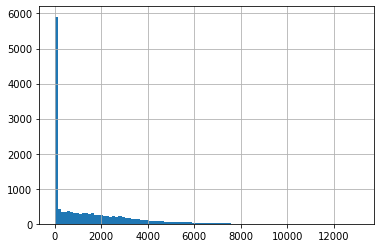

In [132]:
df['Item_Outlet_Sales'].hist(bins = 100)

In [133]:
#it is a right skewd variable and would need some data transformation to treat its skewnes

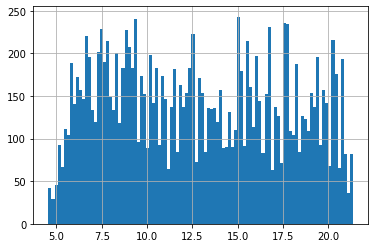

In [134]:
df['Item_Weight'].hist(bins = 100);

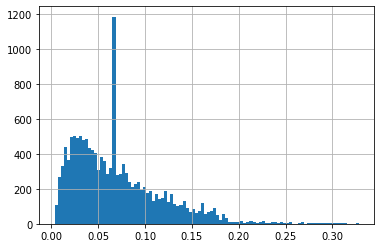

In [135]:
df['Item_Visibility'].hist(bins = 100)

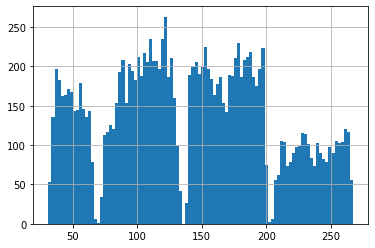

In [136]:
df['Item_MRP'].hist(bins = 100)

In [137]:
#4 different distribution :)

In [138]:
######now of catagorical variable

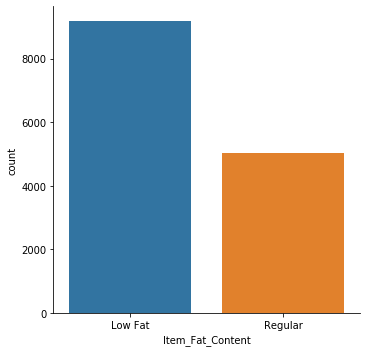

In [139]:
import seaborn as sns
sns.catplot(x="Item_Fat_Content", kind="count", data=df)

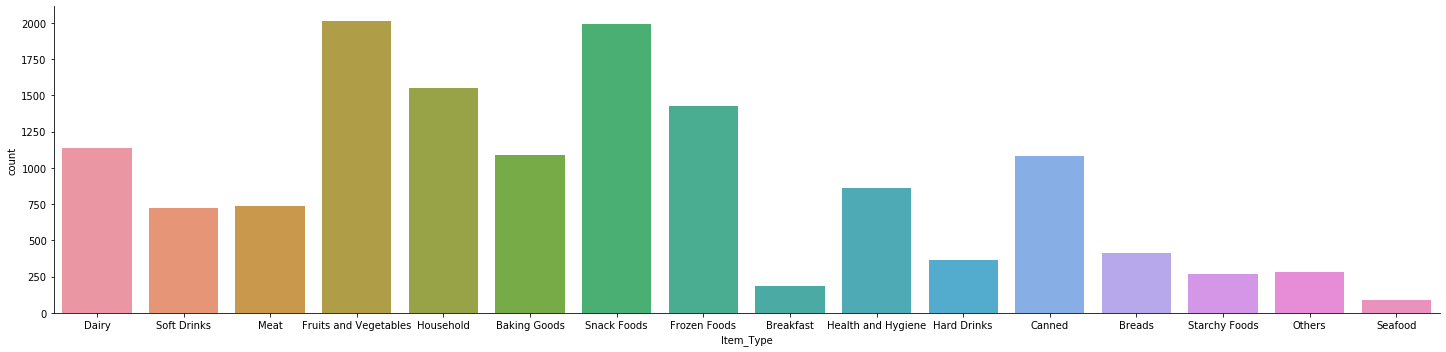

In [140]:
sns.catplot('Item_Type',kind = 'count',data =df,aspect =4)

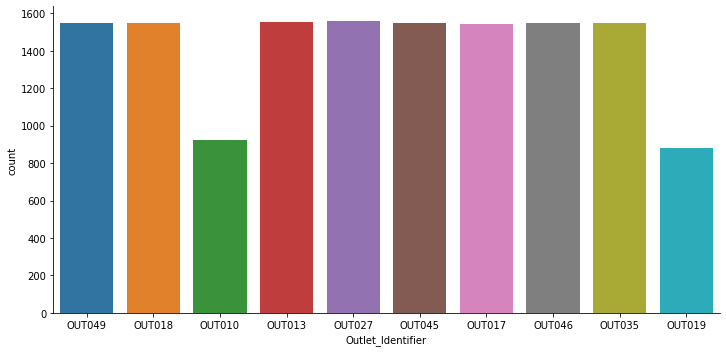

In [141]:
sns.catplot('Outlet_Identifier',kind = 'count',data = df,aspect = 2)

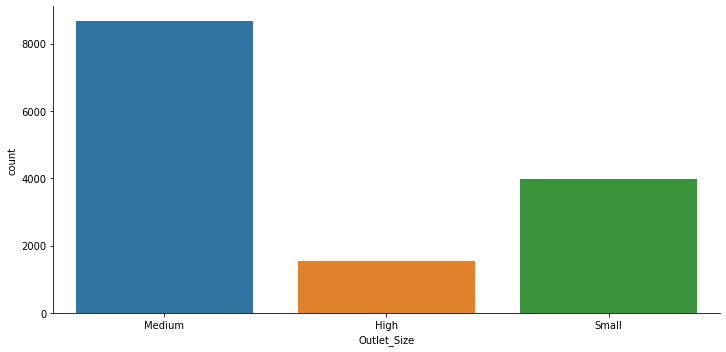

In [142]:
sns.catplot('Outlet_Size',kind = 'count',data =df,aspect = 2)

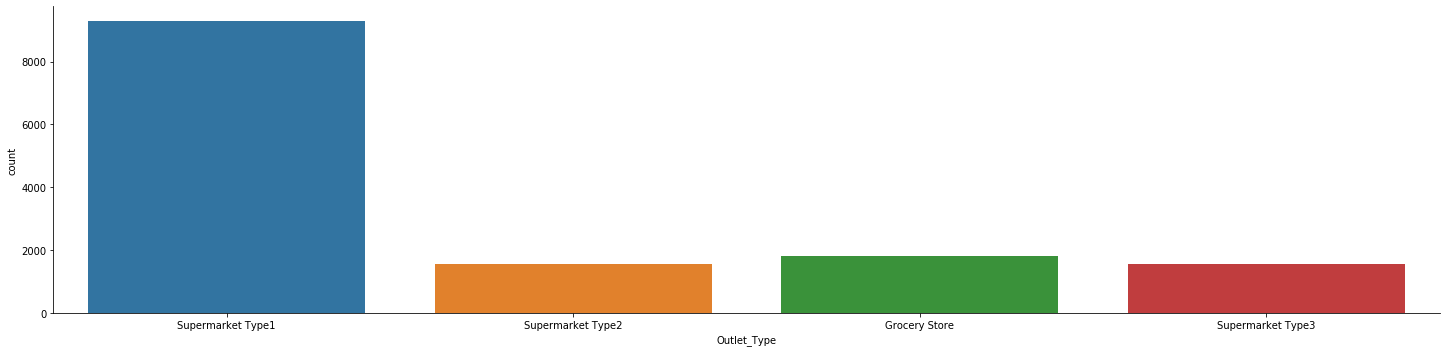

In [143]:
sns.catplot('Outlet_Type',kind = 'count',data = df,aspect =4)


In [144]:
#mostly used supermarket1

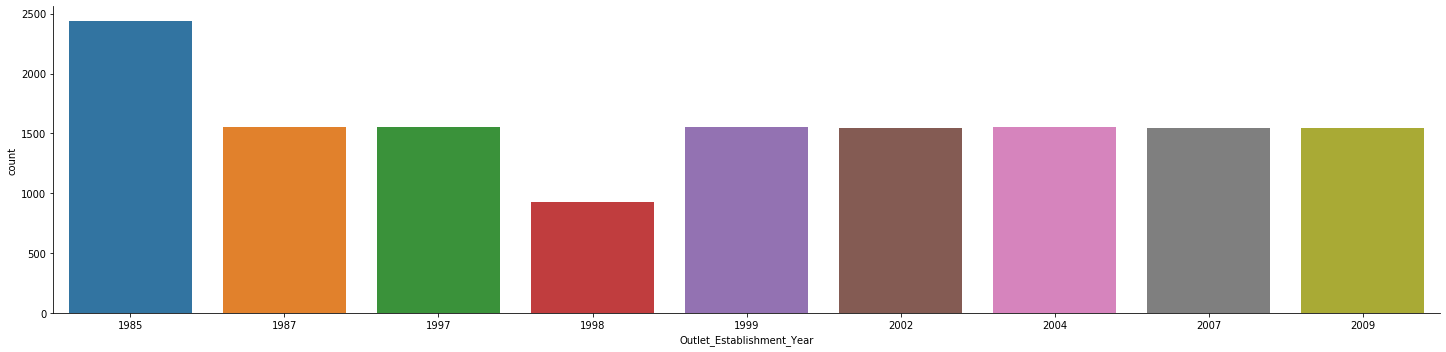

In [145]:
sns.catplot('Outlet_Establishment_Year',kind = 'count',data = df,aspect =4)

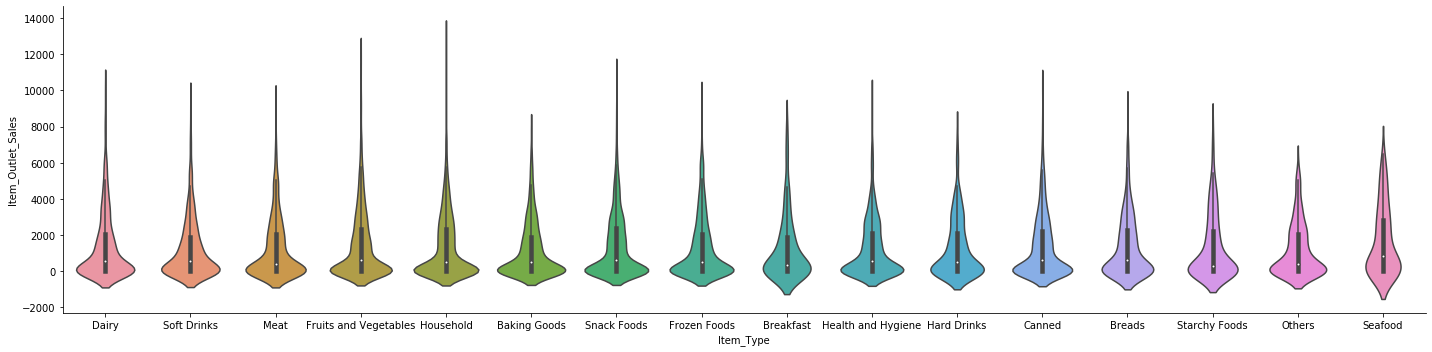

In [146]:
sns.catplot(x = 'Item_Type',y = 'Item_Outlet_Sales',kind = 'violin',data =df,aspect=4)

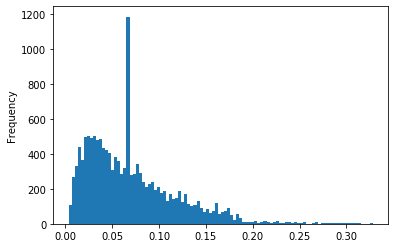

In [147]:
#lets check again
df['Item_Visibility'].plot(kind = 'hist',bins = 100)

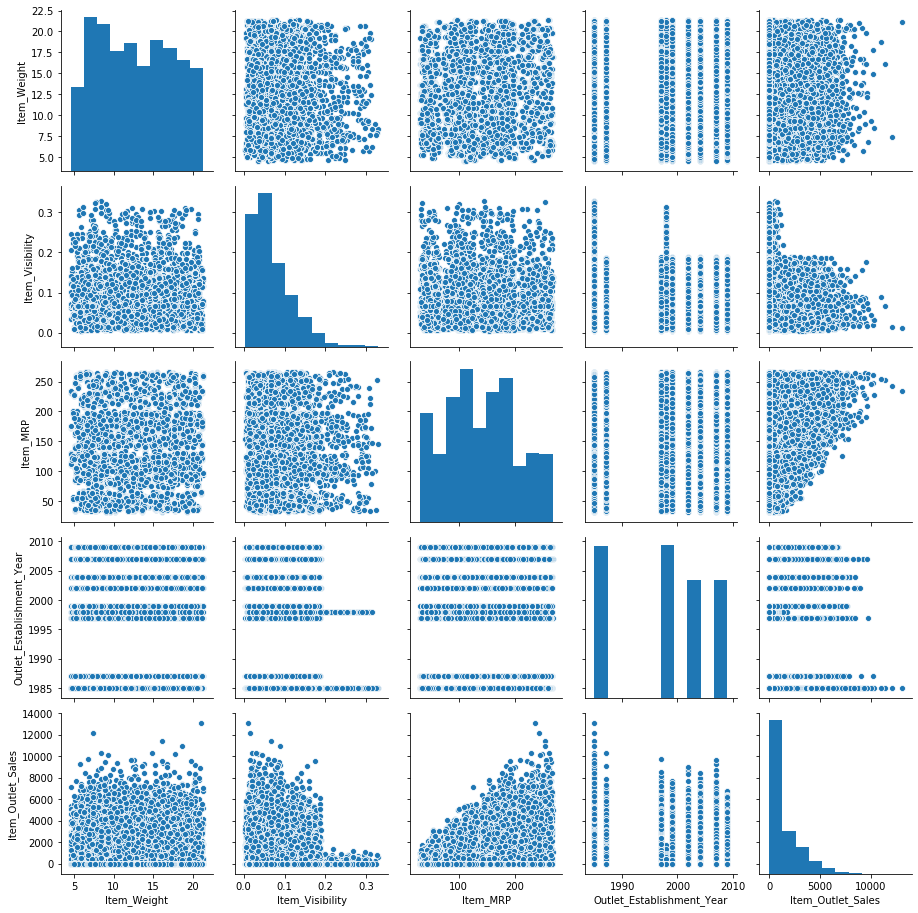

In [148]:
sns.pairplot(df)

In [149]:
(df.corr())

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.020085,0.035751,0.000247,0.021262
Item_Visibility,-0.020085,1.000000,-0.008790,-0.088598,-0.078374
Item_MRP,0.035751,-0.008790,1.000000,0.000141,0.342781
Outlet_Establishment_Year,0.000247,-0.088598,0.000141,1.000000,-0.029489
Item_Outlet_Sales,0.021262,-0.078374,0.342781,-0.029489,1.000000


In [150]:
df=pd.get_dummies(df,columns=["Item_Fat_Content","Item_Type","Outlet_Location_Type","Outlet_Size","Outlet_Type"])

In [151]:
df

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,source,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,9.30,0.016047,249.8092,OUT049,1999,3735.1380,dftrain,1,0,...,1,0,0,0,1,0,0,1,0,0
1,DRC01,5.92,0.019278,48.2692,OUT018,2009,443.4228,dftrain,0,1,...,0,0,1,0,1,0,0,0,1,0
2,FDN15,17.50,0.016760,141.6180,OUT049,1999,2097.2700,dftrain,1,0,...,1,0,0,0,1,0,0,1,0,0
3,FDX07,19.20,0.065953,182.0950,OUT010,1998,732.3800,dftrain,0,1,...,0,0,1,0,1,0,1,0,0,0
4,NCD19,8.93,0.065953,53.8614,OUT013,1987,994.7052,dftrain,1,0,...,0,0,1,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,0.013496,141.3154,OUT046,1997,0.0000,dftest,0,1,...,1,0,0,0,0,1,0,1,0,0
14200,FDD47,7.60,0.142991,169.1448,OUT018,2009,0.0000,dftest,0,1,...,0,0,1,0,1,0,0,0,1,0
14201,NCO17,10.00,0.073529,118.7440,OUT045,2002,0.0000,dftest,1,0,...,0,1,0,0,1,0,0,1,0,0
14202,FDJ26,15.30,0.065953,214.6218,OUT017,2007,0.0000,dftest,0,1,...,0,1,0,0,1,0,0,1,0,0


In [152]:

df['Outlet_Years'] = 2013 - df['Outlet_Establishment_Year']
#for i in corrcolumns:
#    plt.subplot(i+1)
#    sns.boxplot(df[corrcolumns[i]],color='green',orient='v')
#   plt.tight_layout()

In [153]:
df['Outlet_Years'] 

0        14
1         4
2        14
3        15
4        26
         ..
14199    16
14200     4
14201    11
14202     6
14203    11
Name: Outlet_Years, Length: 14204, dtype: int64

In [154]:
#lets make a column "Outlet__Years_of_operation" and drop "Outlet_Establishment_Year"
df["Outlet__Years_of_operation"]=df["Outlet_Establishment_Year"]
df.drop(columns=["Outlet_Establishment_Year"],inplace=True)

In [155]:
(df.skew(),df['Outlet_Years'] .skew())

(Item_Weight                         0.100417
 Item_Visibility                     1.320683
 Item_MRP                            0.130728
 Item_Outlet_Sales                   1.544684
 Item_Fat_Content_Low Fat           -0.613645
 Item_Fat_Content_Regular            0.613645
 Item_Type_Baking Goods              3.188122
 Item_Type_Breads                    5.583994
 Item_Type_Breakfast                 8.567051
 Item_Type_Canned                    3.191879
 Item_Type_Dairy                     3.097172
 Item_Type_Frozen Foods              2.659666
 Item_Type_Fruits and Vegetables     2.054787
 Item_Type_Hard Drinks               6.022573
 Item_Type_Health and Hygiene        3.690792
 Item_Type_Household                 2.509852
 Item_Type_Meat                      4.044381
 Item_Type_Others                    6.910772
 Item_Type_Seafood                  12.515386
 Item_Type_Snack Foods               2.074854
 Item_Type_Soft Drinks               4.077023
 Item_Type_Starchy Foods          

In [156]:
import numpy as np
df.skew()
for col in df.skew().index:
    if col in corrcolumns:
        if df.skew().loc[col]>0.5:
            df[col]=np.sqrt(df[col])
        if df.skew().loc[col]<-0.5:
            df[col]=np.cbrt(df[col])

In [157]:
df.skew(),df['Outlet_Years'].skew()

(Item_Weight                         0.100417
 Item_Visibility                     0.417572
 Item_MRP                            0.130728
 Item_Outlet_Sales                   0.457386
 Item_Fat_Content_Low Fat           -0.613645
 Item_Fat_Content_Regular            0.613645
 Item_Type_Baking Goods              3.188122
 Item_Type_Breads                    5.583994
 Item_Type_Breakfast                 8.567051
 Item_Type_Canned                    3.191879
 Item_Type_Dairy                     3.097172
 Item_Type_Frozen Foods              2.659666
 Item_Type_Fruits and Vegetables     2.054787
 Item_Type_Hard Drinks               6.022573
 Item_Type_Health and Hygiene        3.690792
 Item_Type_Household                 2.509852
 Item_Type_Meat                      4.044381
 Item_Type_Others                    6.910772
 Item_Type_Seafood                  12.515386
 Item_Type_Snack Foods               2.074854
 Item_Type_Soft Drinks               4.077023
 Item_Type_Starchy Foods          

In [ ]:
#lets drop Item_Identifier,Outlet_Identifier,source #as it does not help in prediction
df.drop(columns=["Item_Identifier","Outlet_Identifier"],inplace=True)

In [161]:
#Lets separate the train and test
df_train=df.loc[df["source"]=="dftrain"]
df_test=df.loc[df["source"]=="dftest"]
df_test.reset_index(drop=True,inplace=True)


In [164]:
# input and output variable from df_train
x=df_train.drop(columns=["Item_Outlet_Sales"])
y=df_train[["Item_Outlet_Sales"]]

In [165]:
x

,Item_Weight,Item_Visibility,Item_MRP,source,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Location_Type_Tier 3,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Years,Outlet__Years_of_operation
0,9.300,0.126678,249.8092,dftrain,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,14,1999
1,5.920,0.138846,48.2692,dftrain,0,1,0,0,0,0,...,1,0,1,0,0,0,1,0,4,2009
2,17.500,0.129461,141.6180,dftrain,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,14,1999
3,19.200,0.256813,182.0950,dftrain,0,1,0,0,0,0,...,1,0,1,0,1,0,0,0,15,1998
4,8.930,0.256813,53.8614,dftrain,1,0,0,0,0,0,...,1,1,0,0,0,1,0,0,26,1987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.238293,214.5218,dftrain,1,0,0,0,0,0,...,1,1,0,0,0,1,0,0,26,1987
8519,8.380,0.216754,108.1570,dftrain,0,1,1,0,0,0,...,0,0,1,0,0,1,0,0,11,2002
8520,10.600,0.187580,85.1224,dftrain,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,9,2004
8521,7.210,0.381078,103.1332,dftrain,0,1,0,0,0,0,...,1,0,1,0,0,0,1,0,4,2009


In [166]:
#lets drop source column from x
x.drop(columns=["source"],inplace=True)

In [167]:
# scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
newx = sc.fit_transform(x)
newx=pd.DataFrame(newx,columns=x.columns)

In [172]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(regr,newx,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(newx, y,random_state = r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("r2 score corresponding to ",r_state," is ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state," is ",max_r_score)
    return final_r_state

In [173]:
from sklearn.model_selection import cross_val_score
def model_evaluation(model,x,y):
    c_scores=cross_val_score(model,x,y,cv=5,scoring="r2")
    print("Mean r2 score for regressor: ",c_scores.mean())
    print("standard deviation in r2 score for regressor: ",c_scores.std())
    print(c_scores)

In [174]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
dtr=DecisionTreeRegressor()
r_state=maxr2_score(dtr,newx,y)

r2 score corresponding to  42  is  0.33629560986030815
r2 score corresponding to  43  is  0.2921430380746619
r2 score corresponding to  44  is  0.3172265646773813
r2 score corresponding to  45  is  0.3322962336606867
r2 score corresponding to  46  is  0.26844828389983666
r2 score corresponding to  47  is  0.3037062837474721
r2 score corresponding to  48  is  0.36459226106834663
r2 score corresponding to  49  is  0.3548379621122849
r2 score corresponding to  50  is  0.3335230744296902
r2 score corresponding to  51  is  0.3366577783151051
r2 score corresponding to  52  is  0.296669640937408
r2 score corresponding to  53  is  0.27841961939880877
r2 score corresponding to  54  is  0.32857759212470916
r2 score corresponding to  55  is  0.31170643027990885
r2 score corresponding to  56  is  0.3142728268469236
r2 score corresponding to  57  is  0.2966766340399164
r2 score corresponding to  58  is  0.2840157035036164
r2 score corresponding to  59  is  0.29959417094650465
r2 score corresponding

In [179]:
# random forest regressor
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.model_selection import GridSearchCV
#import warnings
#warnings.filterwarnings("ignore")
#rfr=RandomForestRegressor()
#parameters = {"n_estimators":[10,100,500]}
#clf = GridSearchCV(rfr, parameters, cv=5,scoring="r2")
#clf.fit(newx,y)
#clf.best_params_

In [180]:
#we have to use  pca to reduce the dimensionality
from sklearn.decomposition import PCA
pca = PCA(n_components=23)
pcax=pca.fit_transform(newx)
print("variance :{}".format(np.sum(pca.explained_variance_ratio_)))

variance :0.9499986699605261


In [181]:
#decision tree
from sklearn.tree import DecisionTreeRegressor
import numpy as np
dtr=DecisionTreeRegressor()
r_state=maxr2_score(dtr,pcax,y)

r2 score corresponding to  42  is  0.3223498698666055
r2 score corresponding to  43  is  0.26970275009761757
r2 score corresponding to  44  is  0.26289053484576974
r2 score corresponding to  45  is  0.2908737835371835
r2 score corresponding to  46  is  0.21623697597691816
r2 score corresponding to  47  is  0.26934549443341926
r2 score corresponding to  48  is  0.33214222501760005
r2 score corresponding to  49  is  0.26521127975114367
r2 score corresponding to  50  is  0.25217806644506013
r2 score corresponding to  51  is  0.25023952993365184
r2 score corresponding to  52  is  0.2509370291744121
r2 score corresponding to  53  is  0.2746882790623181
r2 score corresponding to  54  is  0.31119582162280157
r2 score corresponding to  55  is  0.24835030614264575
r2 score corresponding to  56  is  0.2645544964243477
r2 score corresponding to  57  is  0.2899570879047787
r2 score corresponding to  58  is  0.22086972227635815
r2 score corresponding to  59  is  0.2831403717655081
r2 score correspo

In [182]:
# Random forest regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
rfr=RandomForestRegressor()
parameters = {"n_estimators":[10,100,500]}
clf = GridSearchCV(rfr, parameters, cv=5,scoring="r2")
clf.fit(pcax,y)
clf.best_params_

{'n_estimators': 500}

In [ ]:
rfr=RandomForestRegressor(n_estimators=500)
r_state=maxr2_score(rfr,pcax,y)

r2 score corresponding to  42  is  0.6333833525710199
r2 score corresponding to  43  is  0.6382789679604893
r2 score corresponding to  44  is  0.6366518430244028
r2 score corresponding to  45  is  0.633035832385735
r2 score corresponding to  46  is  0.5908415078944094
r2 score corresponding to  47  is  0.6176492465776074
r2 score corresponding to  48  is  0.6322232390838904
r2 score corresponding to  49  is  0.6276839469348117
r2 score corresponding to  50  is  0.6229548535747502
r2 score corresponding to  51  is  0.6155555507930979
r2 score corresponding to  52  is  0.6148934044512464
r2 score corresponding to  53  is  0.6070876159859158
r2 score corresponding to  54  is  0.643138645750178
r2 score corresponding to  55  is  0.6315654277891678
r2 score corresponding to  56  is  0.6110331986539996
r2 score corresponding to  57  is  0.619444389158839
r2 score corresponding to  58  is  0.6239771705700891


In [ ]:
# KNN 
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
parameters = {"n_neighbors":range(2,30)}
clf = GridSearchCV(knr, parameters, cv=5,scoring="r2")
clf.fit(pcax, y)
clf.best_params_

In [ ]:
knr=KNeighborsRegressor(n_neighbors=8)
r_state=maxr2_score(knr,pcax,y)

In [ ]:
# SVM regressor
from sklearn.svm import SVR
import warnings
warnings.filterwarnings("ignore")
svr=SVR()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
clf = GridSearchCV(svr, parameters, cv=5,scoring="r2")
clf.fit(pcax,y)
clf.best_params_

In [ ]:
svr=SVR(kernel="linear",C=10)
r_state=maxr2_score(svr,pcax,y)

In [ ]:
from sklearn.linear_model import LinearRegression
lnr=LinearRegression()
final_r_state=maxr2_score(lnr,pcax,y)

In [ ]:
print("DECISION TREE REGRESSOR\n\n")
model_evaluation(dtr,pcax,y)

In [ ]:
print("RANDOM FOREST REGRESSOR\n\n")
model_evaluation(rfr,pcax,y)

In [ ]:
print("KNN REGRESSOR\n\n")
model_evaluation(knr,pcax,y)

In [ ]:
print("SVM REGRESSOR\n\n")
model_evaluation(svr,pcax,y)

In [ ]:
print("Linear regression\n\n")
model_evaluation(lnr,pcax,y)

In [ ]:
#lets make model using SVM
x_train, x_test, y_train, y_test = train_test_split(pcax, y,random_state = 76,test_size=0.20)
svr.fit(x_train,y_train)
y_pred = svr.predict(x_test)

In [ ]:
#for SVM
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is: ",r2_score(y_test,y_pred))

In [ ]:
#Lets use random forest also
x_train, x_test, y_train, y_test = train_test_split(pcax, y,random_state = 89,test_size=0.20)
rfr.fit(x_train,y_train)
y_pred = rfr.predict(x_test)

In [ ]:
# for random forest model
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is: ",r2_score(y_test,y_pred))